In [76]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from astropy import units as u

Populating the interactive namespace from numpy and matplotlib


In [67]:
import os
import astropy.io.fits as fits
def chekc_fn(idx):
    fn = '/global/cscratch1/sd/desiproc/dr8-cosmos/decam-sub'+str(idx)+\
    '/tractor/149/tractor-1491p010.fits'
    if os.path.isfile(fn):
        print('%d:true'%idx)
        dat = fits.getdata(fn)
        print(dat['flux_g'].mean(),dat['flux_r'].mean(),dat['flux_z'].mean())
    else:
        print('%d:false'%idx)
        
def getdata_fn(idx):
    fn = '/global/cscratch1/sd/desiproc/dr8-cosmos/decam-sub'+str(idx)+\
    '/tractor/149/tractor-1491p010.fits'
    return fits.getdata(fn)

In [68]:
for i in range(10):
    chekc_fn(i)

0:true
0.0 0.0 59.1117
1:true
0.0 0.0 70.4566
2:false
3:true
19.2342 0.0 0.0
4:false
5:false
6:false
7:false
8:false
9:false


Text(0.5,1,'DR8')

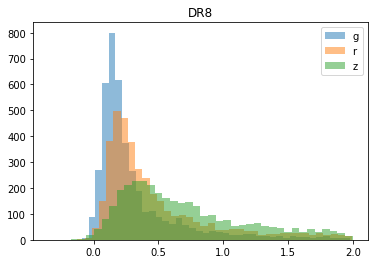

In [69]:
true = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/tractor/149/'+'tractor-1491p010.fits')
true['flux_g'].mean(),true['flux_r'].mean(),true['flux_z'].mean()


sel = (true['flux_g']<2)
p1=plt.hist(true['flux_g'][sel],alpha=0.5,bins=40,label='g')
sel = (true['flux_r']<2)
p2=plt.hist(true['flux_r'][sel],alpha=0.5,bins=40,label='r')
sel = (true['flux_z']<2)
p3=plt.hist(true['flux_z'][sel],alpha=0.5,bins=40,label='z')
plt.legend()
plt.title('DR8')

Text(0.5,1,'DR7 1491p010')

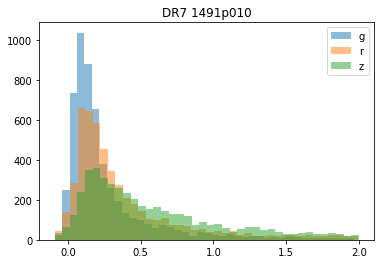

In [70]:
true = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr7/tractor/149/'+'tractor-1491p010.fits')
true['flux_g'].mean(),true['flux_r'].mean(),true['flux_z'].mean()

sel = (true['flux_g']<2)&(true['flux_g']>-0.1)
p1=plt.hist(true['flux_g'][sel],alpha=0.5,bins=40,label='g')
sel = (true['flux_r']<2)&(true['flux_r']>-0.1)
p2=plt.hist(true['flux_r'][sel],alpha=0.5,bins=40,label='r')
sel = (true['flux_z']<2)&(true['flux_z']>-0.1)
p3=plt.hist(true['flux_z'][sel],alpha=0.5,bins=40,label='z')
plt.legend()
plt.title('DR7 1491p010')

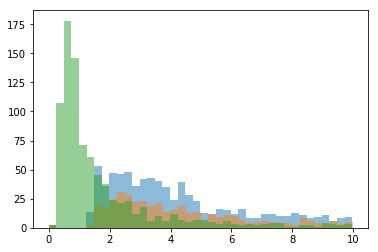

In [71]:
dat = getdata_fn(0)
sel = (dat['flux_z']<10)
p1=plt.hist(dat['flux_z'][sel],alpha=0.5,bins=40)


dat = getdata_fn(1)
sel = (dat['flux_z']<10)
p1=plt.hist(dat['flux_z'][sel],alpha=0.5,bins=40)

dat = getdata_fn(3)
sel = (dat['flux_g']<10)
p1=plt.hist(dat['flux_g'][sel],alpha=0.5,bins=40)

In [141]:
dr7 = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr7/tractor/149/'+'tractor-1491p010.fits')
dr8 = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/tractor/149/'+'tractor-1491p010.fits') 
c1 = SkyCoord(ra=dr7['ra']*u.degree, dec=dr7['dec']*u.degree)
c2 = SkyCoord(ra=dr8['ra']*u.degree, dec=dr8['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1./3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]

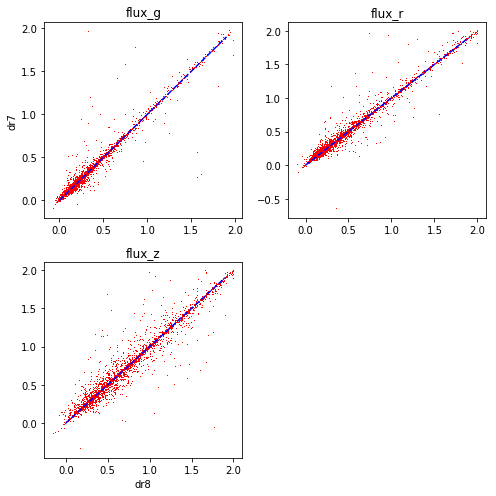

In [142]:
plt.figure(figsize=(7,7))
dr8_sort=dr8[idx2]
dr7_sort=dr7[idx1]

plt.subplot(2,2,1)
plt.ylabel('dr7')
sel = (dr8_sort['flux_g']<2)&(dr7_sort['flux_g']<2)
plt.plot(dr8_sort['flux_g'][sel],dr7_sort['flux_g'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.arange(0,2,0.1),'b--')
plt.title('flux_g')
plt.subplot(2,2,2)
sel = (dr8_sort['flux_r']<2)&(dr7_sort['flux_r']<2)
plt.plot(dr8_sort['flux_r'][sel],dr7_sort['flux_r'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.arange(0,2,0.1),'b--')
plt.title('flux_r')
plt.subplot(2,2,3)
plt.xlabel('dr8')
sel = (dr8_sort['flux_z']<2)&(dr7_sort['flux_z']<2)
plt.plot(dr8_sort['flux_z'][sel],dr7_sort['flux_z'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.arange(0,2,0.1),'b--')
plt.title('flux_z')
plt.tight_layout()

flux g:         mean diff:-0.000329
flux g: squared mean diff:0.019834
flux r:         mean diff:-0.002014
flux r: squared mean diff:0.028278
flux z:         mean diff:-0.000171
flux z: squared mean diff:0.053698


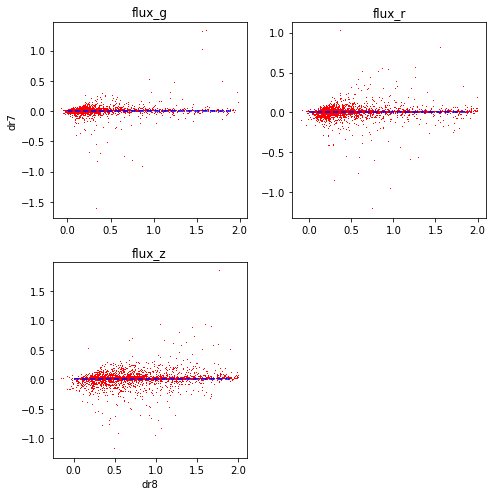

In [150]:
plt.figure(figsize=(7,7))
dr8_sort=dr8[idx2]
dr7_sort=dr7[idx1]

plt.subplot(2,2,1)
plt.ylabel('dr7')
sel = (dr8_sort['flux_g']<2)&(dr7_sort['flux_g']<2)
plt.plot(dr8_sort['flux_g'][sel],dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.zeros(20),'b--')
plt.title('flux_g')
print('flux g:         mean diff:%f'%((dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel])).mean())
print('flux g: squared mean diff:%f'%(np.sqrt((dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel])**2).mean()))
plt.subplot(2,2,2)
sel = (dr8_sort['flux_r']<2)&(dr7_sort['flux_r']<2)
plt.plot(dr8_sort['flux_r'][sel],dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.zeros(20),'b--')
plt.title('flux_r')
print('flux r:         mean diff:%f'%((dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel])).mean())
print('flux r: squared mean diff:%f'%(np.sqrt((dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel])**2).mean()))

plt.subplot(2,2,3)
plt.xlabel('dr8')
sel = (dr8_sort['flux_z']<2)&(dr7_sort['flux_z']<2)
plt.plot(dr8_sort['flux_z'][sel],dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.zeros(20),'b--')
plt.title('flux_z')

print('flux z:         mean diff:%f'%((dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel])).mean())
print('flux z: squared mean diff:%f'%(np.sqrt((dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel])**2).mean()))


plt.tight_layout()

In [110]:
print(len(dr7),len(dr8))

5914 4618


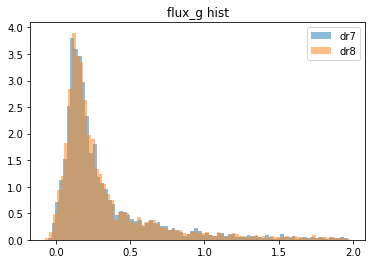

In [120]:
sel = (dr7_sort['flux_g']<2)&(dr7_sort['flux_g']>-0.1)
p1=plt.hist(dr7_sort['flux_g'][sel],alpha=0.5,bins=80,density=True,label='dr7')

sel = (dr8_sort['flux_g']<2)&(dr8_sort['flux_g']>-0.1)
p1=plt.hist(dr8_sort['flux_g'][sel],alpha=0.5,bins=80,density=True,label='dr8')
plt.title('flux_g hist')
plt.legend()

In [123]:
cosmos = getdata_fn(0)#flux_z
#sel = (cosmos['flux_z']<10)
#p1=plt.hist(dat['flux_z'][sel],alpha=0.5,bins=40)


c1 = SkyCoord(ra=cosmos['ra']*u.degree, dec=cosmos['dec']*u.degree)
c2 = SkyCoord(ra=dr8['ra']*u.degree, dec=dr8['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1./3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]

dr8_sort=dr8[idx2]
cosmos_sort=cosmos[idx1]

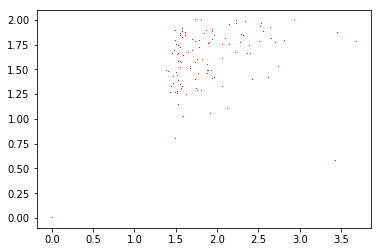

In [137]:
sel = (cosmos_sort['flux_z']<20)&(dr8_sort['flux_z']<2)
plt.plot(cosmos_sort['flux_z'][sel],dr8_sort['flux_z'][sel],'r,')

In [138]:
len(dr8_sort),len(cosmos_sort)

(1055, 1055)

In [160]:
#cosmos-dr8 result is not making sense to me...

In [156]:
#std=0.02, this is not very small
g     = 22.5 - 2.5 * np.log10(0.5 / 0.95)
g2     = 22.5 - 2.5 * np.log10(0.52 / 0.95)

In [159]:
g-g2,g,g2

(0.042583348246953534, 23.196884002382074, 23.15430065413512)

In [ ]:
!p